**1.Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**2.Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**3.Importing the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OIBSIP Data Analytics/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**4.Describing the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.shape

(1143, 13)

Check that the data is having null values are there are not

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**As you can see there is no null values in this dataset**

**5.Visualize the dataset**

In [ ]:
#statistical measures in this dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


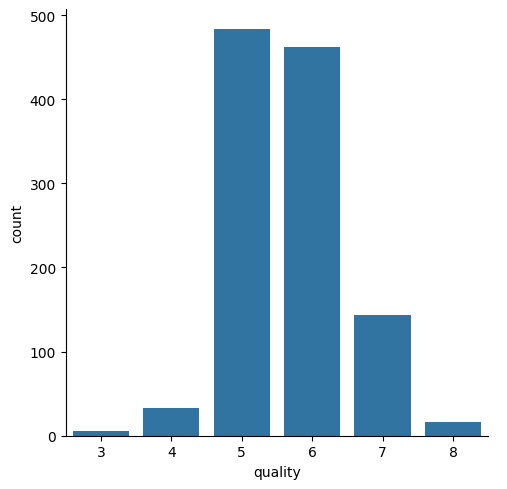

In [ ]:
#number of values ion each quality
sns.catplot(x='quality',data=df,kind='count')

#**Columns v/s Quality**

<Axes: xlabel='quality', ylabel='volatile acidity'>

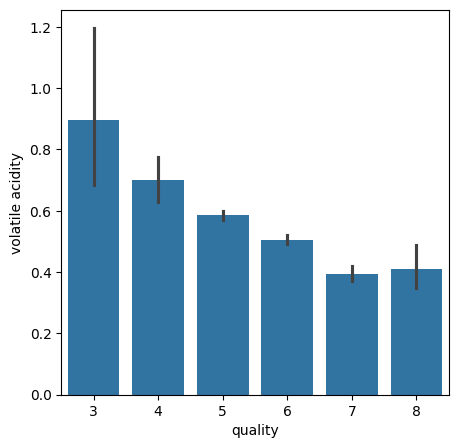

In [ ]:
#Volatile Acidity v/s Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

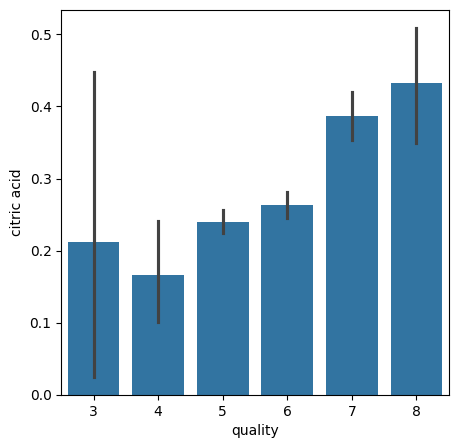

In [ ]:
#citric acid v/s Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

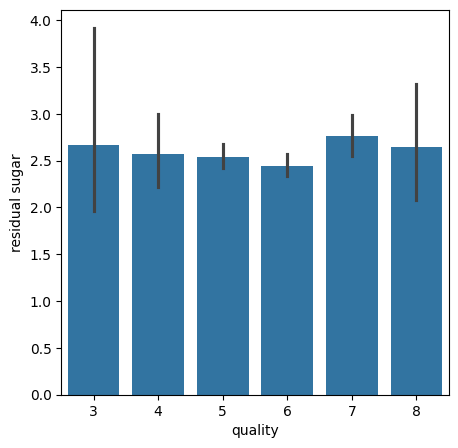

In [ ]:
#Residual Sugar v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

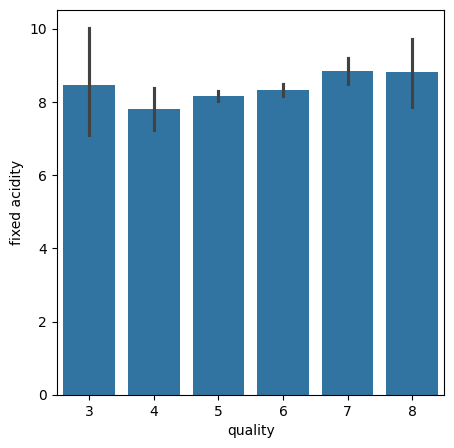

In [ ]:
#Fixed Acidity v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

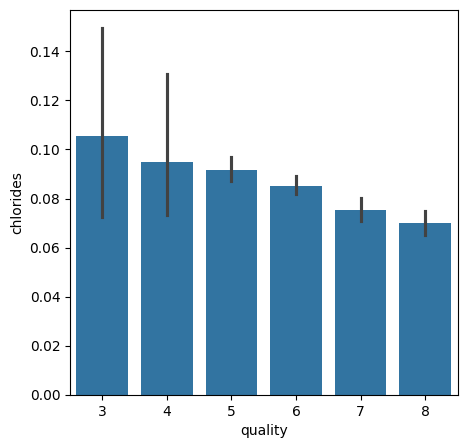

In [ ]:
#chlorides v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='chlorides',data=df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

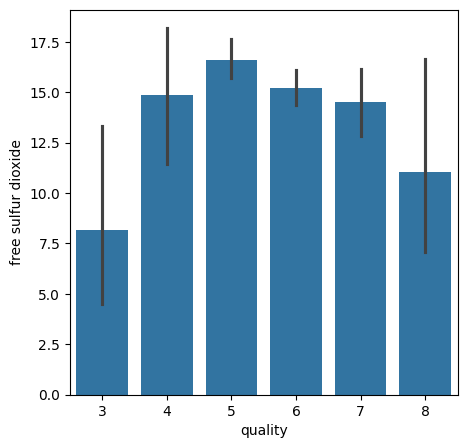

In [ ]:
#free sulfer dioxide v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

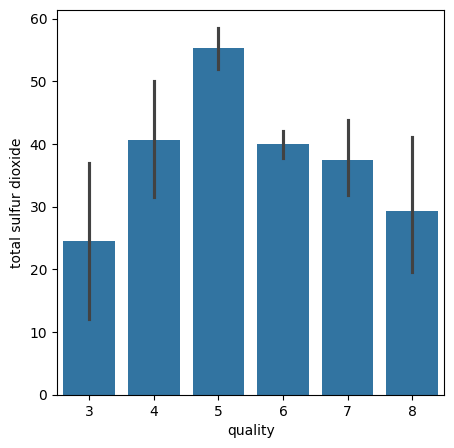

In [ ]:
#total sulfur dioxide v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<Axes: xlabel='quality', ylabel='density'>

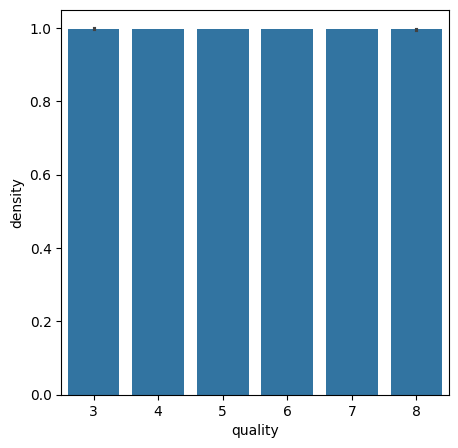

In [ ]:
#Density v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=df)

<Axes: xlabel='quality', ylabel='pH'>

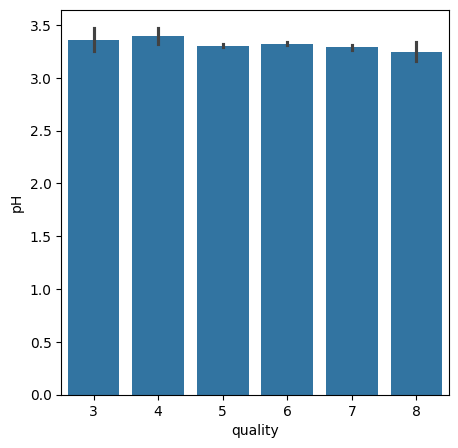

In [ ]:
#pH v/s quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

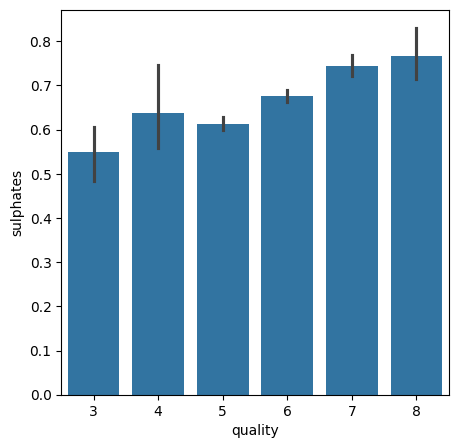

In [ ]:
#sulphate v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

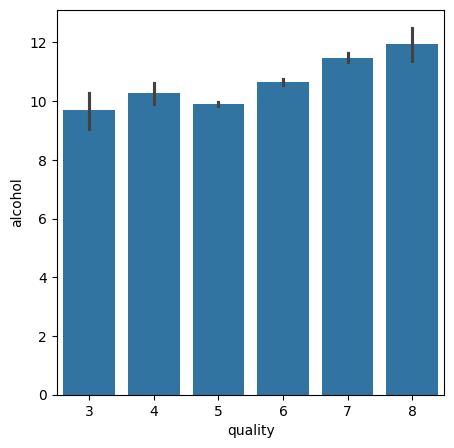

In [ ]:
#Alcohol v/s Quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=df)

**Correlation Matrix**

1.Positive correlation

2.Negitive Correlation

In [ ]:
correlation = df.corr()

<Axes: >

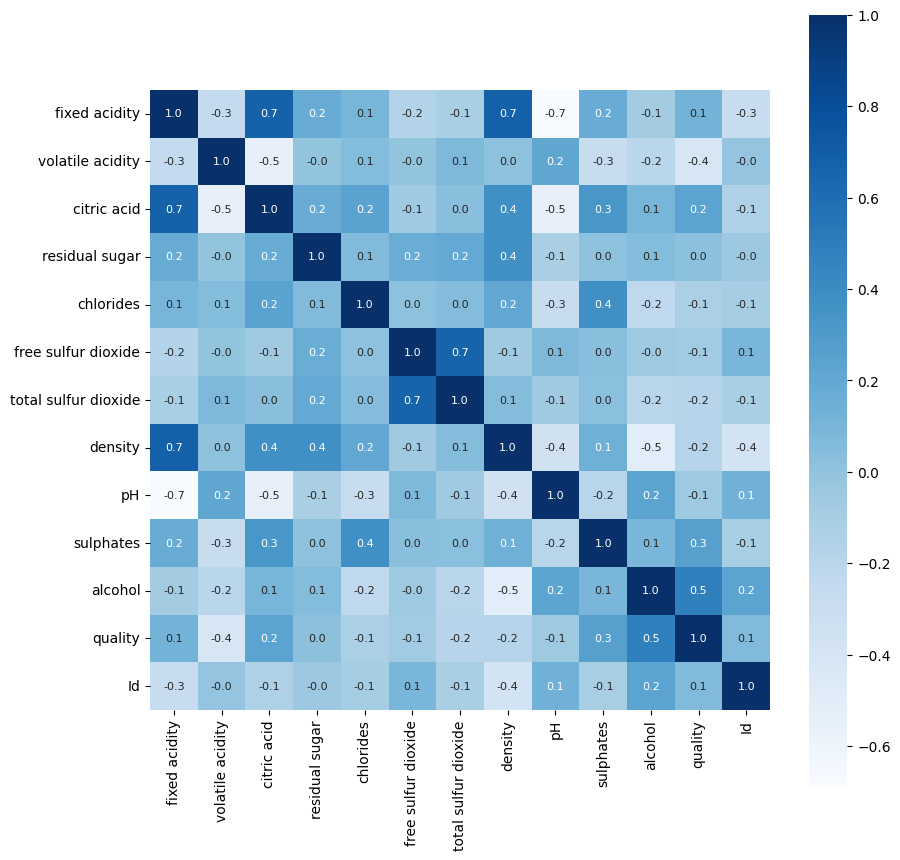

In [ ]:
#Constructing a Heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

**6.Machine Leaarning Models**

In [ ]:
#Select the relevant features
features = ['density', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
X = df[features]
y = df['quality']

In [ ]:
#Splitting the Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initializing classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGD Classifier": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    "SVC": SVC(kernel='rbf', random_state=42)
}

In [ ]:
# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Random Forest Model:
Accuracy: 0.6943
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.66      0.68      0.67        99
           7       0.79      0.58      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

--------------------------------------------------
SGD Classifier Model:
Accuracy: 0.5022
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# Creating a synthetic dataset for visualization
from sklearn.datasets import make_classification
X_vis, y_vis = make_classification(n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y_vis)

SVC(kernel='linear')

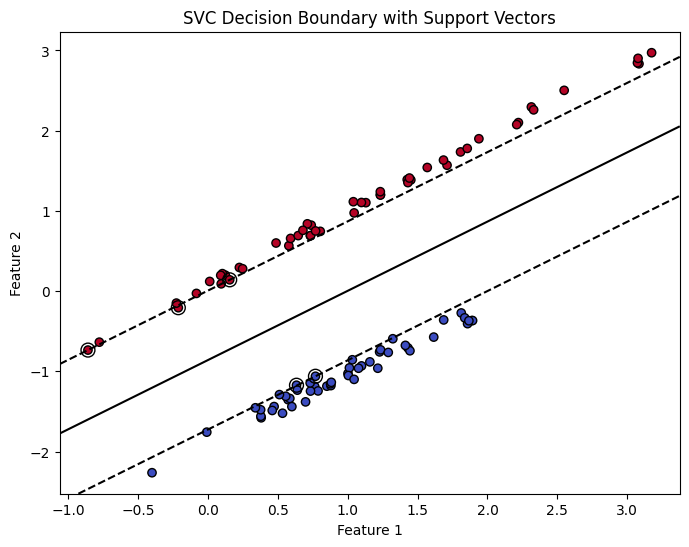

In [ ]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = svm_vis.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
ax.scatter(svm_vis.support_vectors_[:, 0], svm_vis.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVC Decision Boundary with Support Vectors')
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/WineQT.ipynb